#**Ciencia de Datos Aplicada MINE-4101 - TALLER 3**
Univerisdad de los Andes  
Realizado por: 

  Oscar Fernando Bosigas Puerto – 202220008 - o.bosigas

  Yeimy Andrea Cano M – 202213304 - y.cano

  David Polania Mejia - 202213328 - d.polaniam

# **0. Importación de librerias de trabajo**

Primero se procede a hacer la importación de librerías para poder trabajar con los datos y poder realizar el análisis.

In [24]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats
import scipy
import statsmodels.api as sm

#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures , OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 110    
import pylev

# **Entendimiento del Negocio**




Una empresa del sector farmacéutico desea utilizar la información que posee de sus empleados para estimar el nivel de satisfacción laboral que puedan tener en algún momento y usarlo como insumo para detectar posibles fugas de personal. 

El CEO de la farmacéutica le ha pedido a su equipo de científicos de datos que construyan un modelo para tal fin y le proporcionen un conjunto de estrategias que permitan aumentar el nivel de satisfacción laboral de sus empleados y evitar futuras fugas de personal.

## **a. Objetivos del negocio y situación actual.** 

*   Generar un modelo que permita detectar posibles fugas de personal a partir de los datos de satifacción laboral.


# **Entendimiento de los datos**

A continuación el diccionario de datos entregado por el negocio:

|Modelo|Description|
|---|---|
|Age| Age of the employee|
|Attrition| employee attrition|
|BusinessTravel| how frequently an employee travels for business purpose|
|DailyRate| Daily wage of an employee|
|Department| Employee department|
|DistanceFromHome| Distance from home to office in KM's|
|Education| Qualification of employee (masked, higher is better)|
|EducationField| Stream of Education|
|EmployeeCount| EmployeeCount|
|EmployeeNumber| employee number|
|EnvironmentSatisfaction| Environment (higher is better)|
|Gender| Gender of employee|
|HourlyRate| employee hourly rate|
|JobInvolvement| Job involvement (higher is better)|
|JobLevel| level of Job (higher is more important)|
|JobRole| job role of an employee|
|JobSatisfaction| if employee is satisfied?|
|MaritalStatus| employee is married or not|
|MonthlyIncome| income of an employee|
|MonthlyRate| monthly rate of an employee|
|NumCompaniesWorked| number of companies worked for|
|Over18| age over 18|
|OverTime| employee works over time|
|PercentSalaryHike| salary hike|
|PerformanceRating| performance rate|
|RelationshipSatisfaction| Relationship satisfaction|
|StandardHours| per week standard work hours|
|StockOptionLevel| company stock option level|
|TotalWorkingYears| total working years|
|TrainingTimesLastYears| Training time|
|WorkLifeBalance| Work life balance|
|YearsAtCompany| total years at current company|
|YearsInCurrentRole| total years in current role|
|YearsSinceLastPromotion| years since last promotion|
|YearsWithCurrManager| Years worked under current manager|

De acuero a la descripción de las columnas, la variable objetivo es *'Attrition'*

## **a. Adquisición e integración de datos.**

El archivo de datos está como archivo de CSV, separado por ';'. El archivo se deja en github para poder leer los datos desde ahi:

In [26]:
# Loading data
url = 'https://raw.githubusercontent.com/yacanom/CDA_MINE-4101_repo/main/Taller%203/Data_Taller_3.csv'
data = pd.read_csv(url, sep=';', decimal=",")

Se revisa la estructura de los datos

In [27]:
data.head(10)

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,80.0,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,80.0,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,80.0,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,80.0,0,8,3,3,8,7,3,0,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80.0,1,6,3,3,2,2,2,2,0
5,4.0,32.0,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,80.0,0,8,2,2,7,7,3,6,0
6,1.0,59.0,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,80.0,3,12,3,2,1,0,0,0,0
7,3.0,30.0,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,...,80.0,1,1,2,3,1,0,0,0,0
8,3.0,38.0,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,...,80.0,0,10,2,3,9,7,1,8,0
9,3.0,36.0,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,...,80.0,2,17,3,2,7,7,7,7,0


## **b. Limpieza y preparación de datos.**

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   JobSatisfaction           1494 non-null   float64
 1   Age                       1503 non-null   float64
 2   Attrition                 1505 non-null   object 
 3   BusinessTravel            1506 non-null   object 
 4   DailyRate                 1506 non-null   int64  
 5   Department                1506 non-null   object 
 6   DistanceFromHome          1506 non-null   int64  
 7   Education                 1506 non-null   int64  
 8   EducationField            1506 non-null   object 
 9   EmployeeCount             1506 non-null   int64  
 10  EmployeeNumber            1506 non-null   int64  
 11  EnvironmentSatisfaction   1506 non-null   int64  
 12  Gender                    1506 non-null   object 
 13  HourlyRate                1506 non-null   int64  
 14  JobInvol

In [29]:
data.describe()

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
count,1494.000000,1503.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,...,1499.0,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000
mean,2.744311,37.086494,803.978752,9.229084,2.915671,1.000664,753.500000,2.729084,66.280212,2.729084,...,80.0,0.790173,11.220452,2.802789,2.758964,7.041169,4.212483,2.169987,4.112882,0.007968
std,1.099938,10.848391,403.962331,8.135153,1.031172,0.025768,434.889066,1.092854,21.275971,0.717816,...,0.0,0.850911,7.778530,1.293076,0.705698,6.568092,3.618337,3.196186,3.572208,0.088938
min,1.000000,3.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,30.000000,465.000000,2.000000,2.000000,1.000000,377.250000,2.000000,48.000000,2.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,3.000000,36.000000,805.000000,7.000000,3.000000,1.000000,753.500000,3.000000,66.000000,3.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,4.000000,43.000000,1161.000000,14.000000,4.000000,1.000000,1129.750000,4.000000,84.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,4.000000,200.000000,1499.000000,29.000000,7.000000,2.000000,1506.000000,4.000000,190.000000,4.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,100.000000,18.000000,15.000000,17.000000,1.000000


De una primera observación general de los datos se puede indentificar:
  * Se tienen 36 columnas de datos, y 1506 registros.
  * Se tienen 3 tipos de datos: float64(3), int64(24), object(9).
  * Las siguientes columnas tienen datos incompletos: JobSatisfaction(1494), Age(1503), Attrition(1505), y StandardHours (1499).

In [30]:
#datos vacíos columna JobSatisfaction
data[data['JobSatisfaction'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
15,NaN,29.0,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,...,80.0,1,10,1,3,10,9,8,8,1
69,NaN,36.0,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,1,...,80.0,1,2,0,2,1,0,0,0,1
129,NaN,49.0,No,Travel_Rarely,470,Research & Development,20,4,Medical,1,...,80.0,0,16,2,2,15,11,5,11,1
265,NaN,29.0,No,Travel_Rarely,1210,Sales,2,3,Medical,1,...,80.0,2,10,2,3,0,0,0,0,1
604,NaN,42.0,No,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,...,80.0,1,10,3,2,9,8,7,8,1
739,NaN,27.0,No,Travel_Rarely,1055,Research & Development,2,4,Life Sciences,1,...,80.0,1,4,2,3,3,2,2,2,1
844,NaN,30.0,No,Travel_Rarely,852,Sales,10,3,Marketing,1,...,80.0,1,10,3,3,10,3,1,4,1
887,NaN,42.0,No,Travel_Frequently,458,Research & Development,26,5,Medical,1,...,80.0,0,20,6,3,1,0,0,0,1
907,NaN,44.0,No,Travel_Rarely,1099,Sales,5,3,Marketing,1,...,80.0,1,26,5,3,22,9,3,10,1
990,NaN,33.0,No,Travel_Frequently,1111,Sales,5,1,Life Sciences,1,...,80.0,0,8,2,4,5,4,1,2,1


In [31]:
#Conocer la estadística descriptiva para entender los datos
data['JobSatisfaction'].describe()

count    1494.000000
mean        2.744311
std         1.099938
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

In [32]:
print("mediana",data['JobSatisfaction'].median())
print("media",data['JobSatisfaction'].mean())

mediana 3.0
media 2.7443105756358768


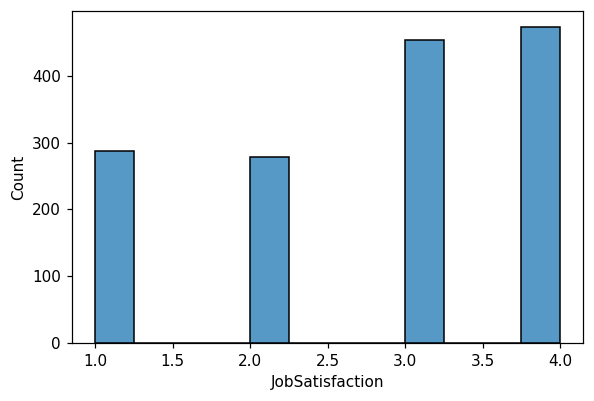

In [33]:
#histograma para ver la distribución
sns.histplot(data=data, x="JobSatisfaction")

Más de un poco del 60% de los datos se concentran entre 3.0 y 4.0. Estadísticamente la mediana es 3.0 y la media es 2.7, dado que se observa que los datos son enteros se propone usar la mediada como dato para imputar los datos faltantes.

In [34]:
#imputar datos fataltantes de JobSatisfaction con la mediana:
data['JobSatisfaction'] = data['JobSatisfaction'].fillna(data['JobSatisfaction'].median())

In [35]:
#datos vacíos columna Age
data[data['Age'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80.0,1,6,3,3,2,2,2,2,0
977,3.0,NaN,No,Non-Travel,999,Research & Development,26,1,Technical Degree,1,...,80.0,3,5,2,3,5,4,0,0,0
1340,3.0,NaN,No,Travel_Rarely,1266,Sales,10,4,Technical Degree,1,...,80.0,1,10,4,3,10,9,1,7,0


In [36]:
#Conocer la estadística descriptiva para entender los datos de AGE
data['Age'].describe()

count    1503.000000
mean       37.086494
std        10.848391
min         3.000000
25%        30.000000
50%        36.000000
75%        43.000000
max       200.000000
Name: Age, dtype: float64

In [37]:
print("mediana",data['Age'].median())
print("media",data['Age'].mean())

mediana 36.0
media 37.08649367930805


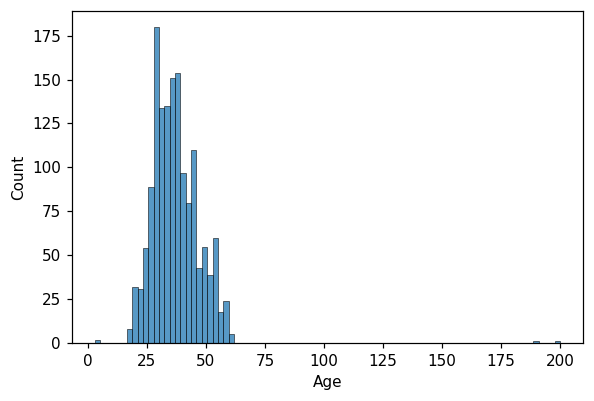

In [38]:
#histograma para ver la distribución
sns.histplot(data=data, x="Age")


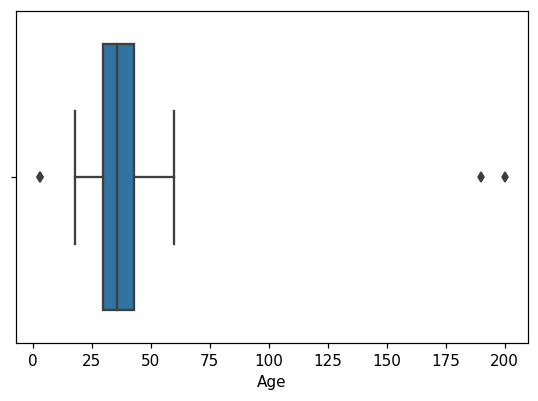

In [39]:
#otra visualización para los datos out
sns.boxplot(x=data["Age"])

In [40]:
data[ (data['Age'] > 75) | (data['Age'] < 18) ].sort_values(by=['Age'])

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
511,2.0,3.0,No,Travel_Rarely,913,Research & Development,9,2,Medical,1,...,80.0,1,13,2,3,3,2,0,2,0
958,4.0,3.0,No,Travel_Rarely,943,Research & Development,9,3,Life Sciences,1,...,80.0,1,10,0,2,9,7,1,6,0
149,2.0,190.0,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,...,80.0,0,1,3,3,1,0,0,0,0
1485,4.0,200.0,No,Travel_Rarely,391,Research & Development,16,2,Life Sciences,1,...,80.0,0,0,6,3,0,0,0,0,0


Se puede observar que para la columna Age (edad) existen valores atípicos: edades de 3 años (no son posibles) y muy superiores (175 y 200 años). Se tiene una mediana 36.0 y una media 37.086, esta última es afectada por los valores superiores por lo que se propone:

*   Imputar los valores pendientes con la mediana (36.0)
*   Interpretar los valores atípicos como un problema de digitación, por lo cual 3 se reemplaza con 30, 190 por 19 y 200 por 20



In [41]:
#imputar datos fataltantes de Age con la mediana:
data['Age'] = data['Age'].fillna(data['Age'].median())
#ajustar los valores atípicos:
data['Age'] = data['Age'].apply(lambda x: 30 if (x==3) else x)
data['Age'] = data['Age'].apply(lambda x: x/10 if (x>100) else x)

In [42]:
#datos vacíos columna Attrition
data[data['Attrition'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
1337,2.0,28.0,NaN,Travel_Rarely,1172,Sales,3,3,Med,1,...,80.0,1,1,3,3,1,0,0,0,0


In [43]:
data['Attrition'].describe()

count     1505
unique       3
top         No
freq      1254
Name: Attrition, dtype: object

In [44]:
data['Attrition'].unique()

array(['Yes', 'No', 'Na', nan], dtype=object)

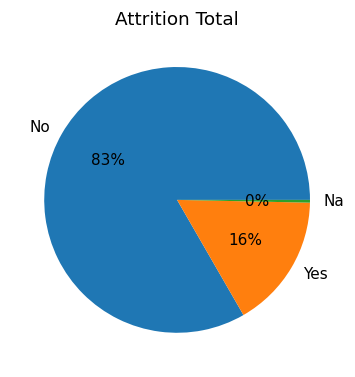

In [45]:
#Ver la distribución de las dos categorías:
df_Attrition = data[{"Attrition", "Age"}].groupby("Attrition").count().sort_values("Age", ascending=False).rename(columns={"Age":"Attrition Total"}).reset_index()

plt.pie(df_Attrition.loc[:,"Attrition Total"], labels = df_Attrition.loc[:, "Attrition"], autopct='%.0f%%')
plt.title('Attrition Total')
plt.show()

In [46]:
df_Attrition

,Attrition,Attrition Total
0,No,1254
1,Yes,246
2,Na,5


Se observa que la moda para la columna Attrition es de “No” (83%) , lo que también nos muestra que los datos están debalanceados. Respecto al dato faltante, se considera imputarlo con el valor de moda “No” (dado que es un solo registro no se espera se afecte considerablemente por esta decisión).

Se infiere que los datos "Na" realmente corresponden a un "No"

In [47]:
#imputar valor nulo de columna Attrition con moda
data['Attrition'] = data['Attrition'].fillna(pd.Series(data['Attrition'].values.flatten()).mode()[0])
#cambiar Na por No en Attrition
data['Attrition'] = data['Attrition'].apply(lambda x: "No" if (x=="Na") else x)

In [49]:
#datos vacíos columna StandardHours 
data[data['StandardHours'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
396,3.0,43.0,No,Travel_Rarely,1473,Research & Development,8,4,Other,1,...,NaN,0,8,3,3,5,2,0,2,0
491,3.0,43.0,No,Travel_Frequently,1001,Research & Development,9,5,Medical,1,...,NaN,1,10,3,3,8,7,4,7,0
532,1.0,47.0,No,Travel_Rarely,703,Sales,14,4,Marketing,1,...,NaN,0,20,2,3,7,7,1,7,0
992,3.0,39.0,No,Non-Travel,1485,Research & Development,25,2,Life Sciences,1,...,NaN,1,13,2,3,6,4,0,5,0
1112,2.0,38.0,Yes,Travel_Rarely,903,Research & Development,2,3,Med,1,...,NaN,2,7,2,3,5,2,1,4,0
1291,1.0,37.0,Yes,Travel_Rarely,370,Research & Development,10,4,Med,1,...,NaN,0,10,4,1,10,3,0,8,0
1377,4.0,49.0,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,...,NaN,0,28,3,3,5,4,4,3,0


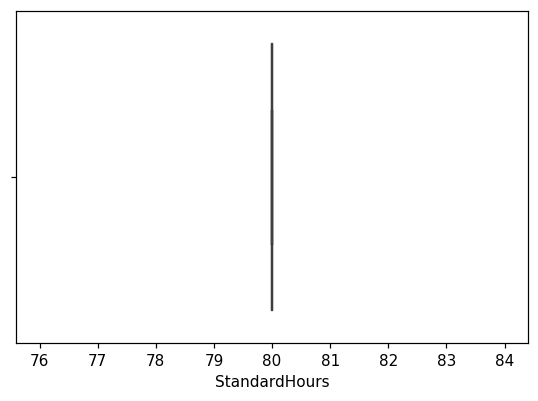

In [81]:
sns.boxplot(x=data["StandardHours"])

In [82]:
data["StandardHours"].describe()

count    1499.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64

Esta columna presenta valor constante en 80, por lo que al imputar los valores nulos se dejan con el mismo valor.

In [83]:
data['StandardHours'] = data['StandardHours'].fillna(data['StandardHours'].median())

Ahora se revisa si las demás columnas tienen algún problema de calidad de datos:

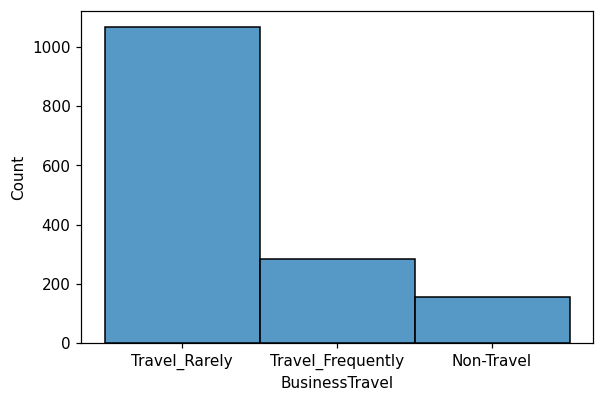

In [50]:
#BusinessTravel
sns.histplot(data=data, x="BusinessTravel")

Se identifica que el valor Travel_Rarely es el más común para los empleados.

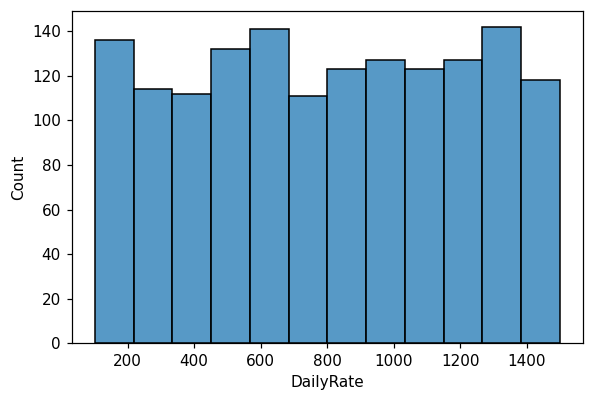

In [51]:
#DailyRate
sns.histplot(data=data, x="DailyRate")

In [52]:
data['DailyRate'].describe()

count    1506.000000
mean      803.978752
std       403.962331
min       102.000000
25%       465.000000
50%       805.000000
75%      1161.000000
max      1499.000000
Name: DailyRate, dtype: float64

In [53]:
print("mediana",data['DailyRate'].median())
print("media",data['DailyRate'].mean())

mediana 805.0
media 803.9787516600265


El valor de salario (DailyRate) se encuentra en números enteros, y no se observan problemas de valores atípicos.

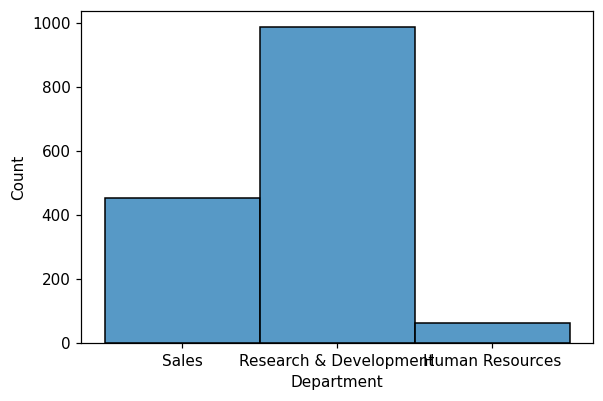

In [54]:
#Department
ax = sns.histplot(data=data, x="Department")

No se identifican problemas con ésta variable categórica.

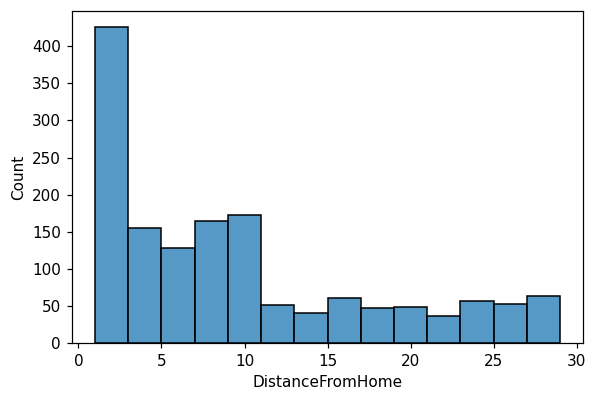

In [55]:
#DistanceFromHome
sns.histplot(data=data, x="DistanceFromHome")

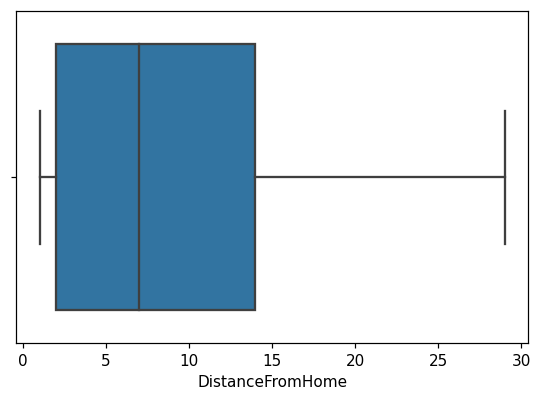

In [56]:
sns.boxplot(x=data["DistanceFromHome"])

In [57]:
data['DistanceFromHome'].describe()

count    1506.000000
mean        9.229084
std         8.135153
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

Respecto a la variable 'DistanceFromHome', el 75 percentil se agrupa en 14 pero dado que los valores mayores no son tan superirores (máximo de 29) no se considera tratar estos datos.

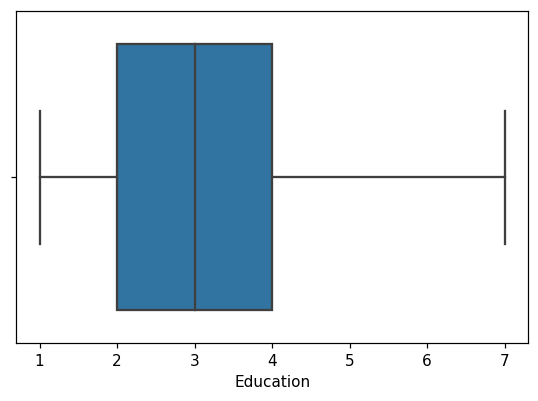

In [58]:
sns.boxplot(x=data["Education"])

Los valores se encuentran entre 1 y 7, de acuerdo al diccionario de datos está enmarada y se entendería que 7 es el grado más alto de educación de un empleado.

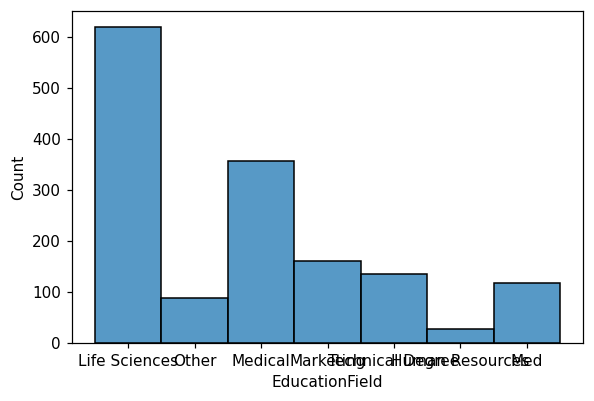

In [59]:
#Columna EducationField
hist  = sns.histplot(data=data, x="EducationField")

In [60]:
data[{"EducationField", "Age"}].groupby("EducationField").count().sort_values("Age", ascending=False).rename(columns={"Age":"EducationField Total"}).reset_index()

,EducationField,EducationField Total
0,Life Sciences,619
1,Medical,357
2,Marketing,161
3,Technical Degree,136
4,Med,118
5,Other,88
6,Human Resources,27


No se observan problemas con esta variable.

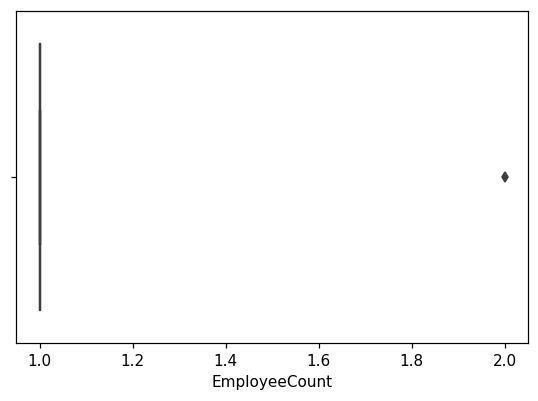

In [61]:
#EmployeeCount
sns.boxplot(x=data["EmployeeCount"])

In [62]:
data[ data['EmployeeCount'] == 2 ]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
351,2.0,32.0,No,Travel_Rarely,1062,Research & Development,2,3,Medical,2,...,80.0,1,8,4,3,8,0,0,7,0


In [74]:
data[ data['EmployeeCount'] == 2 ].at[351 ,'JobRole']

'Laboratory Technician'

Esta columna tiene un único registro en '2.0', que corresponde a un empleado con rol 'Laboratory Technician', se revisaron otros registros con el mismo rol y contenian 1, por lo que se interpreta hubo un error de digitación y se corrige el dato:


In [76]:
data['EmployeeCount'] = data['EmployeeCount'].apply(lambda x: 1 if (x==2) else x)

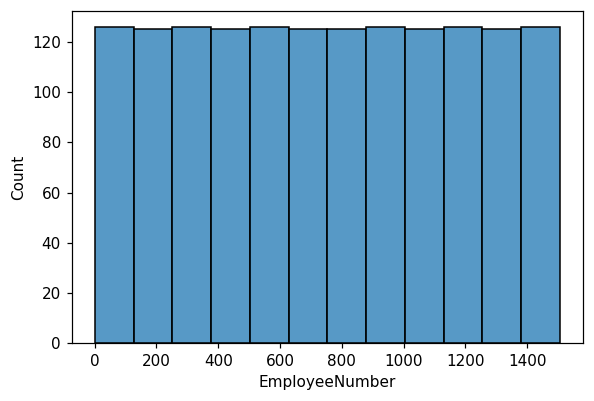

In [78]:
#Columna EmployeeNumber
hist  = sns.histplot(data=data, x="EmployeeNumber")

Tal como se esperaba es un data único para cada uno de lo empleados.

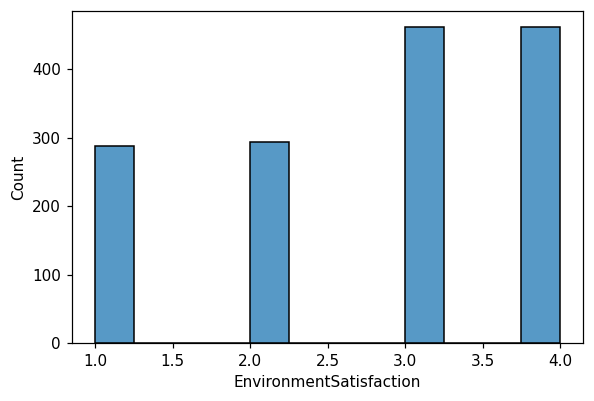

In [79]:
#Columna EnvironmentSatisfaction
hist  = sns.histplot(data=data, x="EnvironmentSatisfaction")

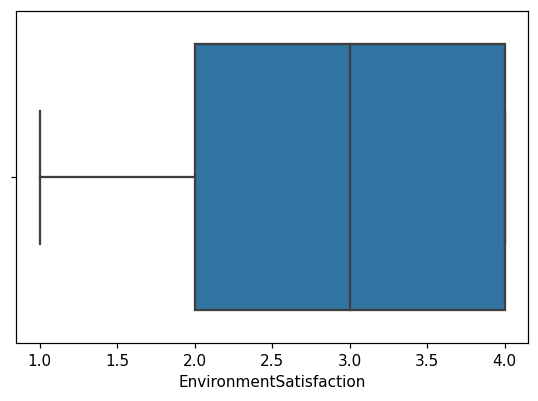

In [80]:
sns.boxplot(x=data["EnvironmentSatisfaction"])

No se encontraron valores atípicos para esta columna.

Se revisa si existen datos duplicados:

In [63]:
data[data.duplicated()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
